## Import necessary Libraries

In [327]:
import numpy as np
import pandas as pd
import string

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

from sklearn.metrics.pairwise import cosine_similarity

## Import the Dataset

In [328]:
df=pd.read_csv("final_dataset.csv", index_col = 0);
df.head(10)

,Question,Answers
0,will covid end soon,"may 1st, i think, is completely unrealistic, s..."
1,who is at higher risk,older adults and people of any age who have se...
2,does covid live on clothes,although the new covid weakens and dies over t...
3,what covid means,"corona means crown, and covides have a crown o..."
4,why covid is worse in us,experts say its due to cuts in federal funding...
5,can covid survive in heat,several countries currently affected by the ne...
6,can covid be transmitted through food,according to the food and drug administration ...
7,where covid originated,"early on, many of the patients at the epicente..."
8,can people who recover from covid be infected ...,"its too early to know for sure. , at this time..."
9,how covid spreads,human covides typically spread through the ai...


In [329]:
df.shape

(652, 2)

## Preprocessing the dataset 

In [330]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [331]:
rows_with_NaN

,Question,Answers
361,Website 2,NaN
374,3rd Website,NaN


In [332]:
df = df.drop_duplicates(subset=['Question'])

In [333]:
df = df.dropna()

In [334]:
df.shape

(613, 2)

## Data Visualisation

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from textblob import TextBlob
from wordcloud import WordCloud
import sklearn

Populating the interactive namespace from numpy and matplotlib


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


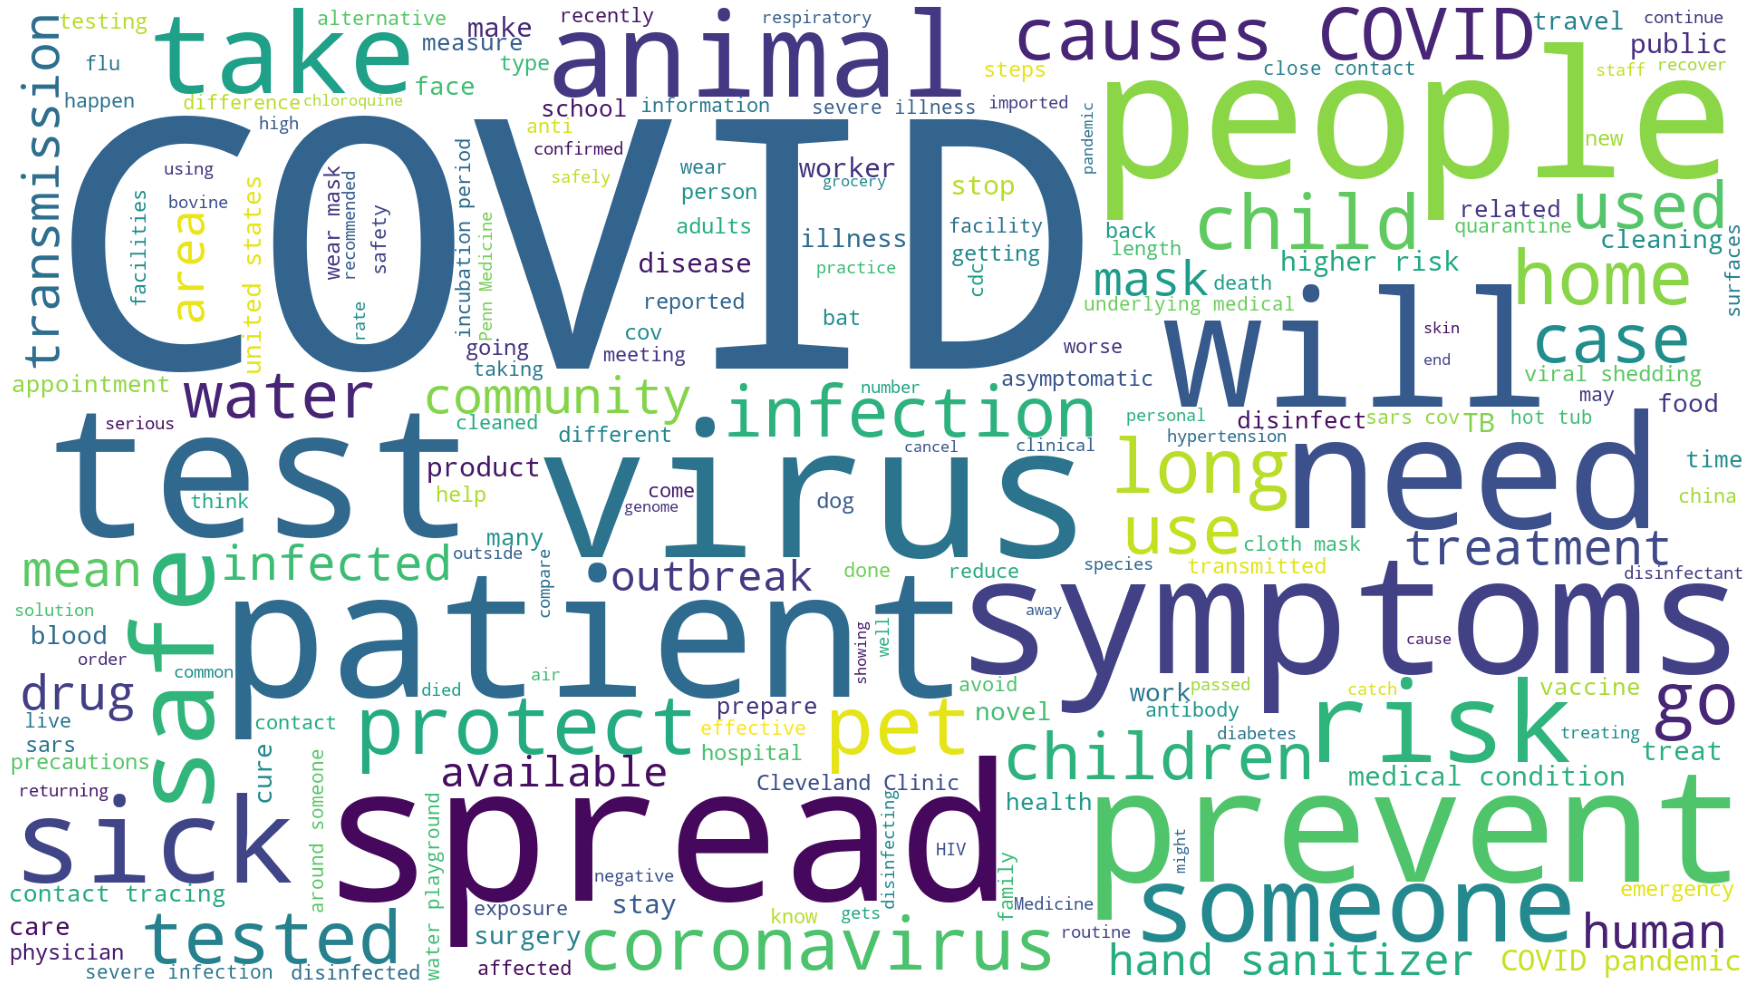

In [336]:
text = ' '.join(df.Question)
cloud = WordCloud(background_color='white', width=1920, height=1080).generate(text)
plt.figure(figsize=(32, 18))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('questions_wordcloud.png')

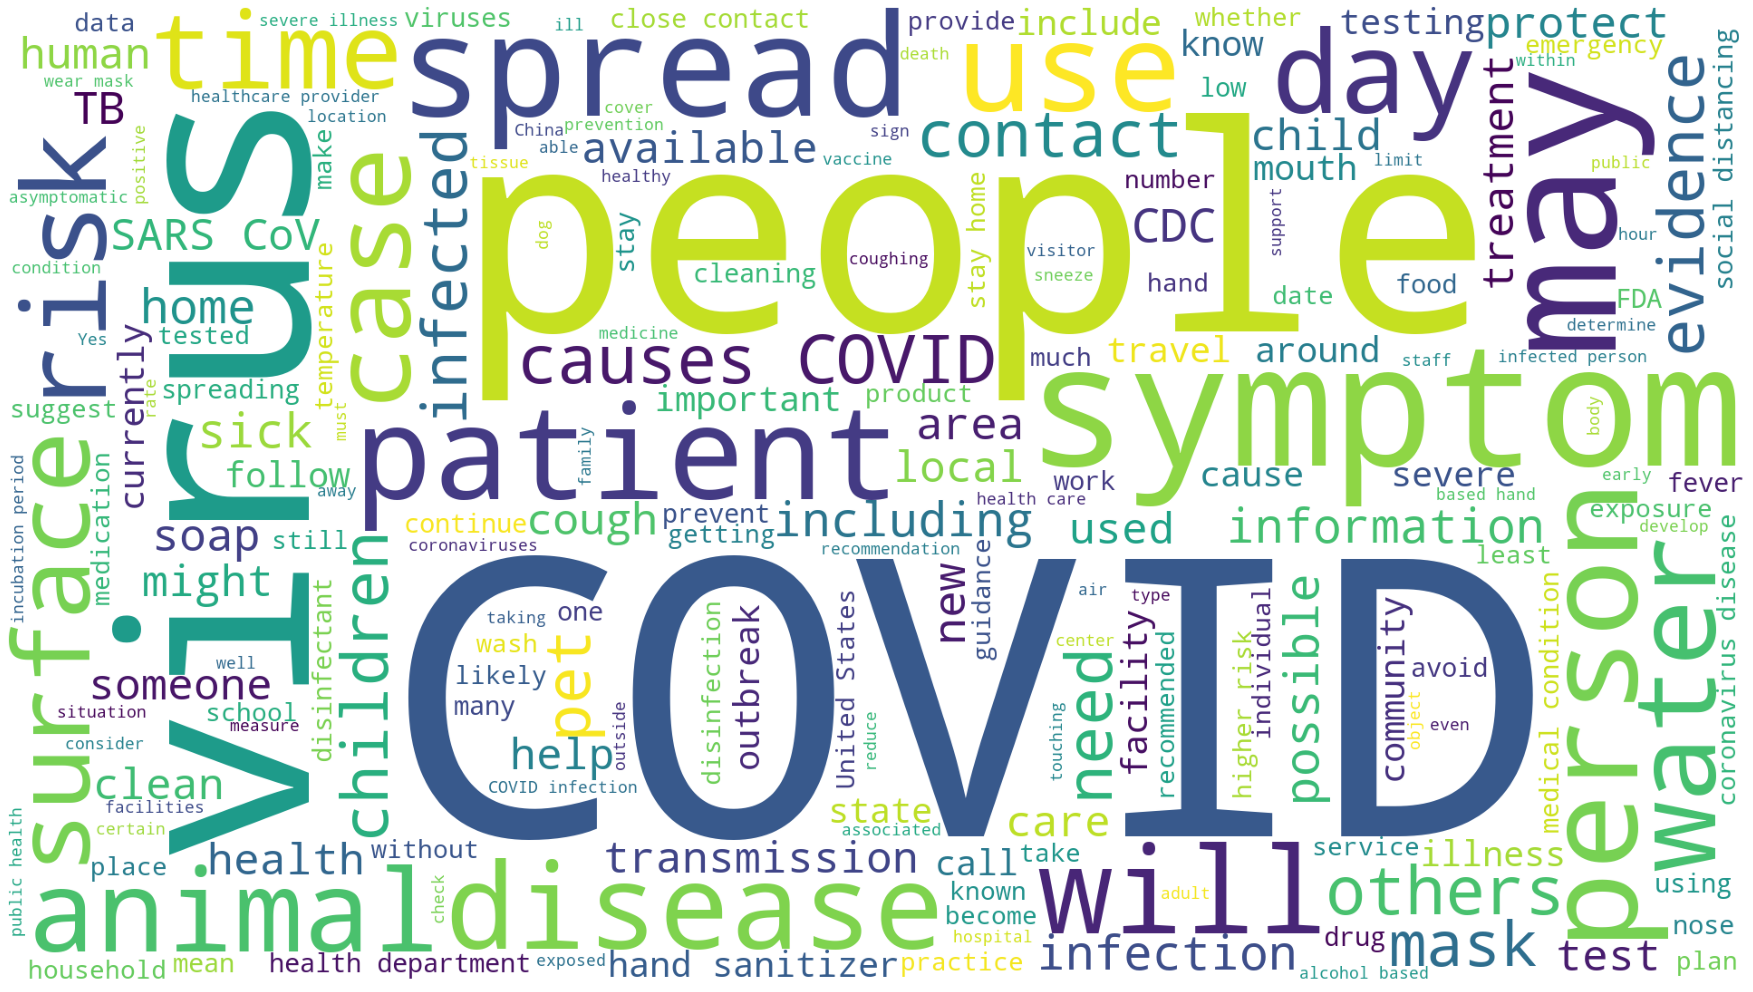

In [337]:
text = ' '.join(df.Answers)
cloud = WordCloud(background_color='white', width=1920, height=1080).generate(text)
plt.figure(figsize=(32, 18))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('questions_wordcloud.png')

In [338]:
get_polarity = lambda x: TextBlob(x).sentiment.polarity
get_subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

df['q_polarity'] = df.Question.apply(get_polarity)
df['a_polarity'] = df.Answers.apply(get_polarity)
df['q_subjectivity'] = df.Question.apply(get_subjectivity)
df['a_subjectivity'] = df.Answers.apply(get_subjectivity)

In [339]:
df.head(10)

,Question,Answers,q_polarity,a_polarity,q_subjectivity,a_subjectivity
0,will covid end soon,"may 1st, i think, is completely unrealistic, s...",0.000000,-0.166667,0.0,0.333333
1,who is at higher risk,older adults and people of any age who have se...,0.250000,0.112030,0.5,0.481499
2,does covid live on clothes,although the new covid weakens and dies over t...,0.136364,0.031238,0.5,0.323460
3,what covid means,"corona means crown, and covides have a crown o...",0.000000,0.174009,0.0,0.430886
4,why covid is worse in us,experts say its due to cuts in federal funding...,-0.400000,-0.008333,0.6,0.247222
5,can covid survive in heat,several countries currently affected by the ne...,0.000000,0.115530,0.0,0.419823
6,can covid be transmitted through food,according to the food and drug administration ...,0.000000,-0.031071,0.0,0.534643
7,where covid originated,"early on, many of the patients at the epicente...",0.000000,0.237662,0.0,0.432143
8,can people who recover from covid be infected ...,"its too early to know for sure. , at this time...",0.000000,0.116667,0.0,0.692593
9,how covid spreads,human covides typically spread through the ai...,0.000000,0.153788,0.0,0.367424


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

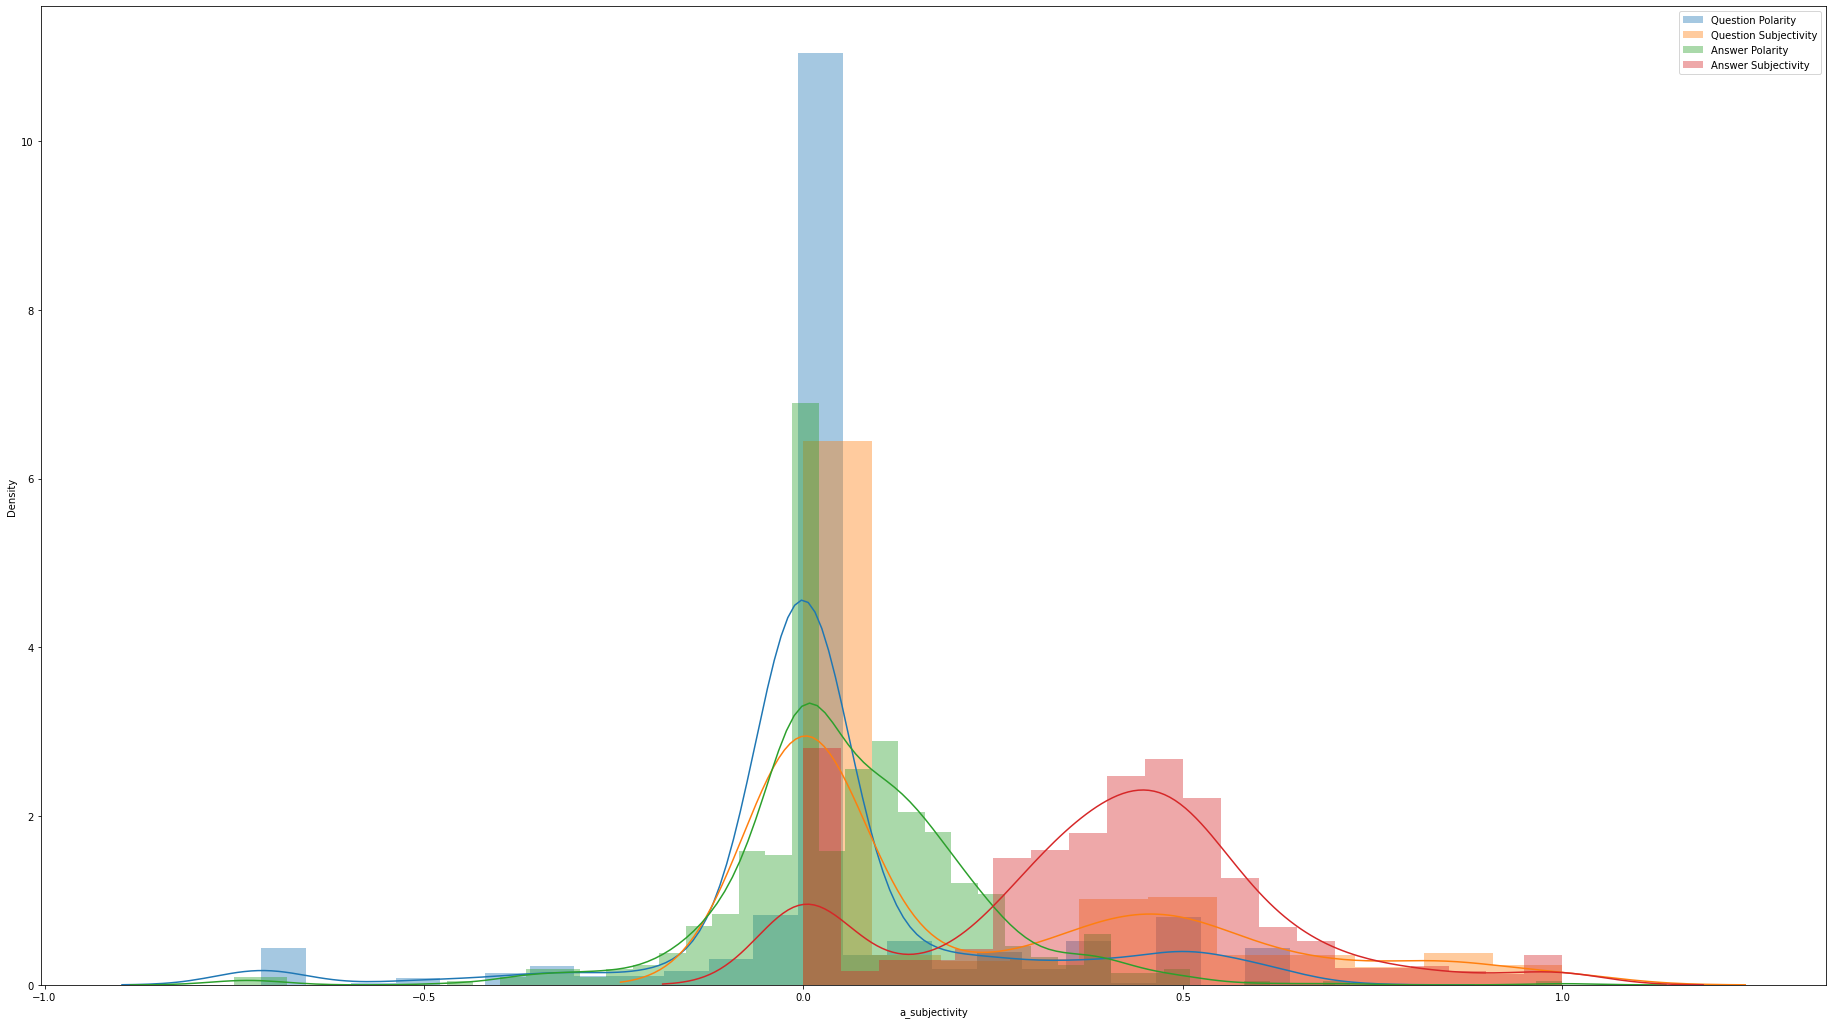

In [340]:
plt.figure(figsize=(32, 18))
sns.distplot(df.q_polarity , label='Question Polarity')
sns.distplot(df.q_subjectivity , label='Question Subjectivity')
sns.distplot(df.a_polarity , label='Answer Polarity')
sns.distplot(df.a_subjectivity , label='Answer Subjectivity')
plt.legend()

## Function to clean dataset 

In [341]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords
def clean_sentence(sentence, stopwords=False):   
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)
    
    if stopwords:
         sentence = remove_stopwords(sentence)
    return sentence

def get_cleaned_sentences(df,stopwords=False):    
    sents=df[["Question"]];
    cleaned_sentences=[]

    for index,row in df.iterrows():
        cleaned=clean_sentence(row["Question"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences_without_stopwords = get_cleaned_sentences(df,stopwords=True)
cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)

## Function to tokenize the dataset

In [342]:
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def my_tokenizer(doc):
    words = word_tokenize(doc)    
    pos_tags = pos_tag(words)
    non_stopwords = [w for w in pos_tags if not w[0].lower() in stopwords_list]
    non_punctuation = [w for w in non_stopwords if not w[0] in string.punctuation]
    lemmas = []
    for w in non_punctuation:
        if w[1].startswith('J'):
            pos = wordnet.ADJ
        elif w[1].startswith('V'):
            pos = wordnet.VERB
        elif w[1].startswith('N'):
            pos = wordnet.NOUN
        elif w[1].startswith('R'):
             pos = wordnet.ADV
        else:
            pos = wordnet.NOUN
        lemmas.append(lemmatizer.lemmatize(w[0], pos))
    return lemmas

## Function to get phrase embeddings

In [343]:
def getWordVec(word,model):
        samp=model['computer'];
        vec=[0]*len(samp);
        try:
                vec=model[word];
        except:
                vec=[0]*len(samp);
        return (vec)

def getPhraseEmbedding(phrase,embeddingmodel):                    
        samp=getWordVec('computer', embeddingmodel);
        vec=np.array([0]*len(samp));
        den=0;
        for word in phrase.split():
            den=den+1;
            vec=vec+np.array(getWordVec(word,embeddingmodel));
        return vec.reshape(1, -1)

## Jaccard Similarity

In [344]:
def get_jaccard_sim(str1, str2): 
    str1 = str(str1)
    str2 = str(str2)    
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

## Bag of Words Model

In [345]:
from gensim import corpora
import pprint

sentence_words = [[word for word in document.split() ]
         for document in cleaned_sentences_with_stopwords]

dictionary = corpora.Dictionary(sentence_words)
#for key, value in dictionary.items():
    #print(key, ' : ', value)

bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
#for sent,embedding in zip(sentence_words,bow_corpus):
 #   print(sent)
  #  print(embedding)

In [346]:
def ask_question_bow(question):
    question=clean_sentence(question,stopwords=False);
    question_embedding = dictionary.doc2bow(question.split())
    
    cos_sim = []
    for index,faq_embedding in enumerate(bow_corpus):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        tup = (index, sim)
        cos_sim.append(tup)
    cos_sim.sort(key=lambda x:x[1])
    i1, s1 = cos_sim[-1]
    i2, s2 = cos_sim[-2]
    i3, s3 = cos_sim[-3]
    return i1, i2, i3, s1, s2, s3    

In [347]:
question = 'What is coronavirus?' 
i1, i2, i3, s1, s2, s3  = ask_question_bow(question)
print("*****BAG OF WORDS MODEL*****\n")
print('Your question:', question)
print("\nTop 3 questions retreived: ")
print('1:\t', df['Question'].iloc[i1], s1)
print('2:\t', df['Question'].iloc[i2], s2)
print('3:\t', df['Question'].iloc[i3], s3)

*****BAG OF WORDS MODEL*****

Your question: What is coronavirus?

Top 3 questions retreived: 
1:	 What is the AHR for death in COVID-19 patients with diabetes 1.0
2:	 What is the HR for death in COVID-19 patients with diabetes 1.0
3:	 What is the RR for severe infection in COVID-19 patients with diabetes 1.0


## Word2Vec Model

In [348]:
from gensim.models import Word2Vec 
import gensim.downloader as api

v2w_model=None;
try:
    v2w_model = gensim.models.KeyedVectors.load("./w2vecmodel.mod")
    print("Loaded w2v model")
except:            
    v2w_model = api.load('word2vec-google-news-300')
    v2w_model.save("./w2vecmodel.mod")
    print("Saved glove model")

w2vec_embedding_size=len(v2w_model['computer']);

Loaded w2v model


In [349]:
def ask_question_w2v(question):
    sent_embeddings=[];
    for sent in cleaned_sentences_with_stopwords:
        sent_embeddings.append(getPhraseEmbedding(sent,v2w_model));

    question_embedding=getPhraseEmbedding(question,v2w_model);
    cos_sim = []
    for index,faq_embedding in enumerate(sent_embeddings):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        tup = (index, sim)
        cos_sim.append(tup)
    cos_sim.sort(key=lambda x:x[1])
    i1, s1 = cos_sim[-1]
    i2, s2 = cos_sim[-2]
    i3, s3 = cos_sim[-3]
    return i1, i2, i3, s1, s2, s3

In [350]:
question = 'What is coronavirus?' 
i1, i2, i3, s1, s2, s3 = ask_question_w2v(question)

print("*****WORD2VEC MODEL*****\n")
print('Your question:', question)
print("\nTop 3 questions retreived: ")
print('1:\t', df['Question'].iloc[i1], s1)
print('2:\t', df['Question'].iloc[i2], s2)
print('3:\t', df['Question'].iloc[i3], s3)

*****WORD2VEC MODEL*****

Your question: What is coronavirus?

Top 3 questions retreived: 
1:	 What is COVID-19 0.8234096125310623
2:	 what is the rna of the covid 0.7272005630480562
3:	 what is cdc doing about covid  0.6751216920269805


## GloVe Model

In [351]:
glove_model=None;
try:
    glove_model = gensim.models.KeyedVectors.load("./glovemodel.mod")
    print("Loaded glove model")
except:            
    glove_model = api.load('glove-twitter-25')
    glove_model.save("./glovemodel.mod")
    print("Saved glove model")   
glove_embedding_size=len(glove_model['computer']);

Loaded glove model


In [352]:
def ask_question_glove(question):
    sent_embeddings=[];
    for sent in cleaned_sentences_with_stopwords:
        sent_embeddings.append(getPhraseEmbedding(sent,glove_model));
    question_embedding=getPhraseEmbedding(question,glove_model);
    cos_sim = []
    for index,faq_embedding in enumerate(sent_embeddings):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        tup = (index, sim)
        cos_sim.append(tup)
    cos_sim.sort(key=lambda x:x[1])
    i1, s1 = cos_sim[-1]
    i2, s2 = cos_sim[-2]
    i3, s3 = cos_sim[-3]
    return i1, i2, i3, s1, s2, s3

In [353]:
question = 'What is coronavirus?' 
i1, i2, i3, s1, s2, s3 = ask_question_glove(question)

print("*****GLOVE MODEL*****\n")
print('Your question:', question)
print("\nTop 3 questions retreived: ")
print('1:\t', df['Question'].iloc[i1], s1)
print('2:\t', df['Question'].iloc[i2], s2)
print('3:\t', df['Question'].iloc[i3], s3)

*****GLOVE MODEL*****

Your question: What is coronavirus?

Top 3 questions retreived: 
1:	 What is COVID-19 0.9797270518273535
2:	 is covid that bad  0.9672182910032671
3:	 How is COVID-19 passed on 0.9636692616797056


## TF-IDF Model

In [354]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(tuple(df['Question']))

In [355]:
def ask_question_tfidf(question):
    cos_sim = []
    query_vect = tfidf_vectorizer.transform([question])
    sim = cosine_similarity(query_vect, tfidf_matrix)[0].tolist()  
    for i, s in enumerate(sim):
        tup = (i,s)
        cos_sim.append(tup)
    cos_sim.sort(key=lambda x:x[1])
    i1, s1 = cos_sim[-1]
    i2, s2 = cos_sim[-2]
    i3, s3 = cos_sim[-3]
    return i1, i2, i3, s1, s2, s3    

In [356]:
question = 'What is coronavirus?' 
i1, i2, i3, s1, s2, s3 = ask_question_tfidf(question)

print("*****TF-IDF MODEL*****\n")
print('Your question:', question)
print("\nTop 3 questions retreived: ")
print('1:\t', df['Question'].iloc[i1], s1)
print('2:\t', df['Question'].iloc[i2], s2)
print('3:\t', df['Question'].iloc[i3], s3)

*****TF-IDF MODEL*****

Your question: What is coronavirus?

Top 3 questions retreived: 
1:	 What is a coronavirus 1.0
2:	 Are coronavirus and COVID-19 the same 0.9100539850943884
3:	 What is a novel coronavirus 0.6647587669570055


## BERT Embedding ('bert-base-nli-mean-tokens')

In [357]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [358]:
def ask_question_bert(question):
    question = clean_sentence(question,stopwords=False);

    sent_bertphrase_embeddings=[];
    for sent in cleaned_sentences_with_stopwords:
        sent_bertphrase_embeddings.append(sbert_model.encode([sent]));

    question_embedding=sbert_model.encode([question]);
    cos_sim = []
    for index,faq_embedding in enumerate(sent_bertphrase_embeddings):
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        tup = (index, sim)
        cos_sim.append(tup)
    cos_sim.sort(key=lambda x:x[1])
    i1, s1 = cos_sim[-1]
    i2, s2 = cos_sim[-2]
    i3, s3 = cos_sim[-3]
    return i1, i2, i3, s1, s2, s3

In [359]:
question = 'What is coronavirus?' 
i1, i2, i3, s1, s2, s3 = ask_question_bert(question)

print("*****BERT MODEL*****\n")
print('Your question:', question)
print("\nTop 3 questions retreived: ")
print('1:\t', df['Question'].iloc[i1], s1)
print('2:\t', df['Question'].iloc[i2], s2)
print('3:\t', df['Question'].iloc[i3], s3)

*****BERT MODEL*****

Your question: What is coronavirus?

Top 3 questions retreived: 
1:	 What is a coronavirus 0.98795265
2:	 What are coronaviruses 0.97996855
3:	 Why is it called a “coronavirus?” 0.9638801


## Comparing output of all models

In [360]:
def ask_question(question): 
    i1, i2, i3, s1, s2, s3  = ask_question_bow(question)
    print("*****BAG OF WORDS MODEL*****\n")
    print('Your question:', question)
    print("\nTop 3 questions retreived: ")
    print('1:\t', df['Question'].iloc[i1], s1)
    print('2:\t', df['Question'].iloc[i2], s2)
    print('3:\t', df['Question'].iloc[i3], s3)
    print("\n--------------------\n")

    i1, i2, i3, s1, s2, s3 = ask_question_tfidf(question)
    print("*****TF-IDF MODEL*****\n")
    print('Your question:', question)
    print("\nTop 3 questions retreived: ")
    print('1:\t', df['Question'].iloc[i1], s1)
    print('2:\t', df['Question'].iloc[i2], s2)
    print('3:\t', df['Question'].iloc[i3], s3)
    print("\n--------------------\n")
    
    i1, i2, i3, s1, s2, s3 = ask_question_w2v(question)
    print("*****WORD2VEC MODEL*****\n")
    print('Your question:', question)
    print("\nTop 3 questions retreived: ")
    print('1:\t', df['Question'].iloc[i1], s1)
    print('2:\t', df['Question'].iloc[i2], s2)
    print('3:\t', df['Question'].iloc[i3], s3)
    print("\n--------------------\n")
 
    i1, i2, i3, s1, s2, s3 = ask_question_glove(question)
    print("*****GLOVE MODEL*****\n")
    print('Your question:', question)
    print("\nTop 3 questions retreived: ")
    print('1:\t', df['Question'].iloc[i1], s1)
    print('2:\t', df['Question'].iloc[i2], s2)
    print('3:\t', df['Question'].iloc[i3], s3)
    print("\n--------------------\n")

    i1, i2, i3, s1, s2, s3 = ask_question_bert(question)
    print("*****BERT MODEL*****\n")
    print('Your question:', question)
    print("\nTop 3 questions retreived: ")
    print('1:\t', df['Question'].iloc[i1], s1)
    print('2:\t', df['Question'].iloc[i2], s2)
    print('3:\t', df['Question'].iloc[i3], s3)

In [361]:
question = "What are some of the symptoms of corona?"
# ask_question(question)

In [362]:
ask_question(question)

*****BAG OF WORDS MODEL*****

Your question: What are some of the symptoms of corona?

Top 3 questions retreived: 
1:	 What purity of ethanol inactivates COVID-19 1.0000000000000002
2:	 What patients are being prioritized for testing 1.0000000000000002
3:	 What restrictions are in place for visitors going to Cleveland Clinic facilities 1.0000000000000002

--------------------

*****TF-IDF MODEL*****

Your question: What are some of the symptoms of corona?

Top 3 questions retreived: 
1:	 What is corona virus 0.7347644797128932
2:	 What are the symptoms of COVID-19 0.4772800518266092
3:	 who covid symptoms  0.4676909504428616

--------------------

*****WORD2VEC MODEL*****

Your question: What are some of the symptoms of corona?

Top 3 questions retreived: 
1:	 What are the symptoms of COVID-19 0.9184710039210187
2:	 What are the common symptoms 0.8640474453385095
3:	 What are the symptoms and complications that COVID-19 can cause 0.8183624489955259

--------------------

*****GLOVE MOD

# Evaluation

In [363]:
testdf = pd.read_csv('testing_faqs.csv')
n = testdf.shape[0]
testdf.head()

,Question,Answer
0,What is a novel coronavirus?,A novel coronavirus is a new coronavirus that ...
1,Why is the disease being called coronavirus di...,"On February 11, 2020 the World Health Organiza..."
2,How does the virus spread?,The virus that causes COVID-19 is thought to s...
3,Can I get COVID-19 from food (including restau...,Currently there is no evidence that people can...
4,Will warm weather stop the outbreak of COVID-19?,It is not yet known whether weather and temper...


In [364]:
def find_relevance(t1, t2):
    t1 = clean_sentence(t1, stopwords=False)
    t2 = clean_sentence(t2, stopwords=False)
    v1 = sbert_model.encode([t1])
    v2 = sbert_model.encode([t2])  
    cos_sim = cosine_similarity(v1, v2)[0][0]
    return cos_sim

### 1. BOW

In [365]:
score = 0
for q, a in zip(testdf['Question'], testdf['Answer']):
    i1, i2, i3, s1, s2, s3 = ask_question_bow(q)
    r1 = find_relevance(df['Question'].iloc[i1], q) + find_relevance(df['Answers'].iloc[i1], a) 
    r2 = find_relevance(df['Question'].iloc[i2], q) + find_relevance(df['Answers'].iloc[i2], a)  
    r3 = find_relevance(df['Question'].iloc[i3], q) + find_relevance(df['Answers'].iloc[i3], a)
    score += (0.5 * r1) + (0.3 * r2) + (0.2 * r1)

In [366]:
bow_score = score/n
bow_score

1.0325257792941527

### 2. TF-IDF

In [367]:
score = 0
for q, a in zip(testdf['Question'], testdf['Answer']):
    i1, i2, i3, s1, s2, s3 = ask_question_tfidf(q)
    r1 = find_relevance(df['Question'].iloc[i1], q) + find_relevance(df['Answers'].iloc[i1], a) 
    r2 = find_relevance(df['Question'].iloc[i2], q) + find_relevance(df['Answers'].iloc[i2], a)  
    r3 = find_relevance(df['Question'].iloc[i3], q) + find_relevance(df['Answers'].iloc[i3], a)
    score += (0.5 * r1) + (0.3 * r2) + (0.2 * r1)

In [368]:
tfidf_score = score/n
tfidf_score

1.8353043327983634

### 3. Word2Vec

In [369]:
score = 0
for q, a in zip(testdf['Question'], testdf['Answer']):
    i1, i2, i3, s1, s2, s3 = ask_question_w2v(q)
    r1 = find_relevance(df['Question'].iloc[i1], q) + find_relevance(df['Answers'].iloc[i1], a) 
    r2 = find_relevance(df['Question'].iloc[i2], q) + find_relevance(df['Answers'].iloc[i2], a)  
    r3 = find_relevance(df['Question'].iloc[i3], q) + find_relevance(df['Answers'].iloc[i3], a)
    score += (0.5 * r1) + (0.3 * r2) + (0.2 * r1)

In [370]:
word2vec_score = score/n
word2vec_score

1.822089294235931

### 4. GloVe

In [371]:
score = 0
for q, a in zip(testdf['Question'], testdf['Answer']):
    i1, i2, i3, s1, s2, s3 = ask_question_glove(q)
    r1 = find_relevance(df['Question'].iloc[i1], q) + find_relevance(df['Answers'].iloc[i1], a) 
    r2 = find_relevance(df['Question'].iloc[i2], q) + find_relevance(df['Answers'].iloc[i2], a)  
    r3 = find_relevance(df['Question'].iloc[i3], q) + find_relevance(df['Answers'].iloc[i3], a)
    score += (0.5 * r1) + (0.3 * r2) + (0.2 * r1)

In [372]:
glove_score = score/n
glove_score

1.7708102011527767

### 5. BERT

In [373]:
score = 0
for q, a in zip(testdf['Question'], testdf['Answer']):
    i1, i2, i3, s1, s2, s3 = ask_question_bert(q)
    r1 = find_relevance(df['Question'].iloc[i1], q) + find_relevance(df['Answers'].iloc[i1], a) 
    r2 = find_relevance(df['Question'].iloc[i2], q) + find_relevance(df['Answers'].iloc[i2], a)  
    r3 = find_relevance(df['Question'].iloc[i3], q) + find_relevance(df['Answers'].iloc[i3], a)
    score += (0.5 * r1) + (0.3 * r2) + (0.2 * r1)

In [374]:
bert_score = score/n
bert_score

1.8592957151241796

In [375]:
n

117